In [28]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [6]:
def process_dataset(folder):
    images = [] 
    filenames = [] 
    labels = [] 

    for label in os.listdir(folder): 
        for filename in os.listdir("dataset/"+label): 
            img = cv.imread(os.path.join("dataset/"+label,filename))
            filenames.append(filename) 
            labels.append(label) 
            if img is not None: 
                width = 256
                height = 256
                dim = (width, height)
                resized = cv.resize(img, dim, interpolation=cv.INTER_AREA)
                gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
                images.append(gray) 
    return images, filenames, labels 


In [7]:
def process_dataset_result(folder):
    images = [] 
    filenames = [] 
    labels = [] 

    for label in os.listdir(folder): 
        for filename in os.listdir("result/"+label): 
            img = cv.imread(os.path.join("result/"+label,filename))
            filenames.append(filename) 
            labels.append(label) 
            if img is not None: 
                width = 256
                height = 256
                dim = (width, height)
                resized = cv.resize(img, dim, interpolation=cv.INTER_AREA)
                gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
                images.append(gray) 
    return images, filenames, labels 


In [10]:
dataset = "dataset/"
images, filenames, labels = process_dataset(dataset)

In [11]:
dataset = "result/"
imagesResult, filenamesResult, labelsResult = process_dataset(dataset)

In [12]:
def calculate_glcm(image):
    glcm = np.zeros((256, 256), dtype=np.float64)
    height, width = image.shape
    for i in range(height):
        for j in range(width - 1):
            glcm[image[i, j], image[i, j + 1]] += 1

    glcm /= glcm.sum()
    return glcm


In [13]:
def calculate_contrast(glcm):
    # Menghitung kontras berdasarkan matriks GLCM
    contrast = 0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            contrast += ((i - j) ** 2) * glcm[i, j]

    return contrast

In [14]:
def calculate_homogeneity(glcm):
    # Menghitung homogenitas berdasarkan matriks GLCM
    homogeneity = 0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            homogeneity += glcm[i, j] / (1 + abs(i - j))

    return homogeneity

In [15]:
def calculate_entropy(glcm):
    # Menghitung entropi berdasarkan matriks GLCM
    entropy = 0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            if glcm[i, j] > 0:
                entropy += glcm[i, j] * math.log2(glcm[i, j])

    return -entropy

In [16]:
# Ekstraksi ciri tekstur untuk setiap citra
contrast_values = []
homogeneity_values = []
entropy_values = []
for i in range(len(images)):
    glcm = calculate_glcm(images[i])
    contrast = calculate_contrast(glcm)
    homogeneity = calculate_homogeneity(glcm)
    entropy = calculate_entropy(glcm)
    contrast_values.append(contrast)
    homogeneity_values.append(homogeneity)
    entropy_values.append(entropy)

# Menampilkan hasil ekstraksi ciri tekstur
data = {'Filename': filenames, 'Contrast': contrast_values, 'Homogeneity': homogeneity_values, 'Entropy': entropy_values}
df = pd.DataFrame(data)
print(df)

                     Filename    Contrast  Homogeneity    Entropy
0              gundul (1).jpg   52.483395     0.280773  10.838833
1             gundul (10).jpg   53.808946     0.276200  10.681469
2            gundul (100).jpg  187.414920     0.196329  12.351989
3            gundul (101).jpg  111.465181     0.220003  11.968528
4            gundul (102).jpg  168.437531     0.205925  12.593211
...                       ...         ...          ...        ...
1103  setengahgundul (95).jpg   99.203263     0.224942  11.879718
1104  setengahgundul (96).jpg  101.463036     0.220421  11.733966
1105  setengahgundul (97).jpg  109.750199     0.212228  11.533223
1106  setengahgundul (98).jpg   90.367387     0.227350  11.251493
1107  setengahgundul (99).jpg   71.625919     0.242589  11.139113

[1108 rows x 4 columns]


In [17]:
# Simpan hasil ekstraksi ke dalam DataFrame
df = pd.DataFrame(data)

# Simpan DataFrame ke dalam file CSV
df.to_csv('hasil_ekstraksi.csv', index=False)

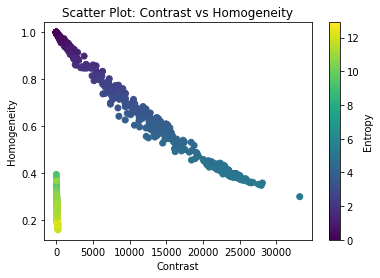

In [18]:
# Membaca data dari file hasil ekstraksi ciri tekstur
data = pd.read_csv('hasil_ekstraksi.csv')

# Visualisasi scatter plot
plt.scatter(data['Contrast'], data['Homogeneity'], c=data['Entropy'], cmap='viridis')
plt.colorbar(label='Entropy')
plt.xlabel('Contrast')
plt.ylabel('Homogeneity')
plt.title('Scatter Plot: Contrast vs Homogeneity')
plt.show()

In [19]:
class Glcm:
    def __init__(self) :
        pass
    
    def derajat_0 (self, img): 
        max = np.max(img) 
        temp = np.zeros([max+1,max+1]) 
        for i in range (len(img)):
            for j in range(len(img[i])-1):
                temp[img[i,j],img[i,j+1]] +=1 
                
        transpose = np.transpose(temp) 
        data = temp+transpose 
        tmp = 0
        
        for i in range (len(data)):
            for j in range(len(data)):
                tmp+=data[i,j]
                
        for i in range(len(data)):
            for j in range(len(data)):
                data[i,j]/=tmp
        return data
    
    def derajat_45 (self, img): 
        max = np.max(img) 
        temp=np.zeros([max+1,max+1])
        for i in range (len (img)-1):
            for j in range (len (img[i])-1):
                temp[img[i+1,j],img[i,j+1]] += 1 
                
        transpose = np.transpose(temp) 
        data= temp+transpose 
        tmp=0
       
        for i in range (len(data)):
            for j in range (len(data)):
                tmp+=data[i,j] 
                
        for i in range (len (data)):
            for j in range (len (data)):
                data[i,j]/=tmp 
        return data 
    
    def derajat_90 (self, img): 
        max = np.max(img) 
        temp=np.zeros([max+1,max+1]) 
        for i in range (len (img)-1):
            for j in range (len (img[i])):
                temp[img[i+1,j],img[i,j]] += 1 
                
        transpose= np.transpose(temp) 
        data= temp+transpose 
        tmp=0
       
        for i in range (len(data)):
            for j in range (len(data)):
                tmp+=data[i,j] 
                
        for i in range (len (data)):
            for j in range (len (data)):
                data[i,j]/=tmp 
        return data 
    
    def derajat_135 (self, img): 
        max = np.max(img) 
        imgTemp=np.zeros([max+1,max+1]) 
        for i in range (len (img)-1):
            for j in range (len (img[i])-1):
                imgTemp[img[i,j],img[i+1,j+1]] += 1 
                
        transpose= np.transpose(imgTemp) 
        data= imgTemp+transpose 
        tmp=0
       
        for i in range (len(data)):
            for j in range (len(data)):
                tmp+=data[i,j] 
                
        for i in range (len (data)):
            for j in range (len (data)):
                data[i,j]/=tmp 
        return data 

    def dissimilarity( data): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= data[i,j]+abs(i-j) 
        return simpan 
    
    def ASM( data): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= pow(data[i,j],2) 
        return simpan 
    
    def contrast( data): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= data[i,j]+pow(i-j,2) 
        return simpan 
    
    def entropi( data): 
        simpan = 0 
        for i in range(len(data)): 
            for j in range(len(data)):
                if data[i,j] > 0:
                    simpan+= -(data[i,j] * math.log(data[i,j])) 
        return simpan 
    
    def energy( data): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+=pow(data[i,j],2)
        return simpan 
    
    def homogenitas(data): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+=data[i,j]/(1+abs(i-j))
        return simpan 
    
    def correlation(data,mI,mJ,tI,tJ): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+=((i-mI)*(j-mJ)*data[i,j])/(tI*tJ)
        return simpan 
    
    def meanI( data): 
        simpan = 0
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= i * data[i,j] 
        return simpan 
    
    def meanJ( data): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= j * data[i,j] 
        return simpan 
    
    def taoI( data,mI):
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= pow((i-mI),2)*data[i,j] 
        simpan = math.sqrt(simpan) 
        return simpan 
    
    def taoJ( data,mJ): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= pow((j-mJ),2)*data[i,j] 
        simpan = math.sqrt(simpan) 
        return simpan 


In [20]:
fitur_glcm = Glcm()
hasil = []
for i in range(len(imagesResult)):
    dat = []
    dat.append(fitur_glcm.derajat_0(imagesResult[i]))
    dat.append(fitur_glcm.derajat_45(imagesResult[i]))
    dat.append(fitur_glcm.derajat_90(imagesResult[i]))
    dat.append(fitur_glcm.derajat_135(imagesResult[i]))
    hasil.append(dat)

In [21]:
frame = []
indeks = 0
for i in hasil:
    save = []
    save.append(images[indeks])
    indeks+=1
    for j in i:
        en = Glcm.energy(j)
        save.append(en)
        
        hm = Glcm.homogenitas(j)
        save.append(hm)
        
        ent = Glcm.entropi(j)
        save.append(ent)
         
        con = Glcm.contrast(j)
        save.append(con)

        dis = Glcm.dissimilarity(j)
        save.append(dis)

        asm = Glcm.ASM(j)
        save.append(asm)
        
        mI = Glcm.meanI(j)
        mJ = Glcm.meanJ(j)
        tI = Glcm.taoI(j,mI)
        tJ = Glcm.taoJ(j,mJ)
        
        
        cor = Glcm.correlation(j,mI,mJ,tI,tJ)
        save.append(cor)
        
    frame.append(save)

In [22]:
headerPass = ['path','energi0','homogenitas0','entropy0','contras0','dissimilarity0','ASM0','correlation0'
           ,'energi45','homogenitas45','entropy45','contras45','dissimilarity45','ASM45','correlation45'
           ,'energi90','homogenitas90','entropy90','contras90','dissimilarity90','ASM90','correlation90'
           ,'energi135','homogenitas135','entropy135','contras135','dissimilarity135','ASM135','correlation135']
df = pd.DataFrame(frame, columns=headerPass)

In [25]:
df['labels'] = labelsResult
df.to_csv(r'TubesData.csv', index=False)

In [26]:
y = df['labels']
x = df.drop(['path', 'labels'], axis=1)

In [31]:
model = SVC()
model2 = KNeighborsClassifier()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=15)

In [32]:
model.fit(X_train, y_train)
model2.fit(X_train, y_train)
pred = model.predict(X_test)
pred2 = model2.predict(X_test)
print(classification_report(y_test, pred, zero_division=1))

                precision    recall  f1-score   support

        gundul       0.37      0.49      0.42        57
         lebat       0.58      0.46      0.51        65
setengahgundul       0.50      0.46      0.48        61

      accuracy                           0.47       183
     macro avg       0.48      0.47      0.47       183
  weighted avg       0.49      0.47      0.47       183



In [33]:
print("SVC")
print(classification_report(y_test, pred, zero_division=1))

SVC
                precision    recall  f1-score   support

        gundul       0.37      0.49      0.42        57
         lebat       0.58      0.46      0.51        65
setengahgundul       0.50      0.46      0.48        61

      accuracy                           0.47       183
     macro avg       0.48      0.47      0.47       183
  weighted avg       0.49      0.47      0.47       183



In [34]:
print("KNNC")
print(classification_report(y_test, pred2))

KNNC
                precision    recall  f1-score   support

        gundul       0.45      0.65      0.53        57
         lebat       0.54      0.46      0.50        65
setengahgundul       0.50      0.36      0.42        61

      accuracy                           0.49       183
     macro avg       0.49      0.49      0.48       183
  weighted avg       0.50      0.49      0.48       183

